## 3.1 데이터 전처리와 스케일 조정

대부분의 머신러닝 알고리즘들은 스케일에 매우 민감합니다. 그래서 보통 이런 알고리즘들에 맞게 데이터의 특성 값을 조정합니다. 보통 특성마다 스케일을 조정해서 데이터를 변경합니다. 

In [4]:
%run setup.py

### 3.1.1 여러가지 전처리 방법

In [5]:
import mglearn

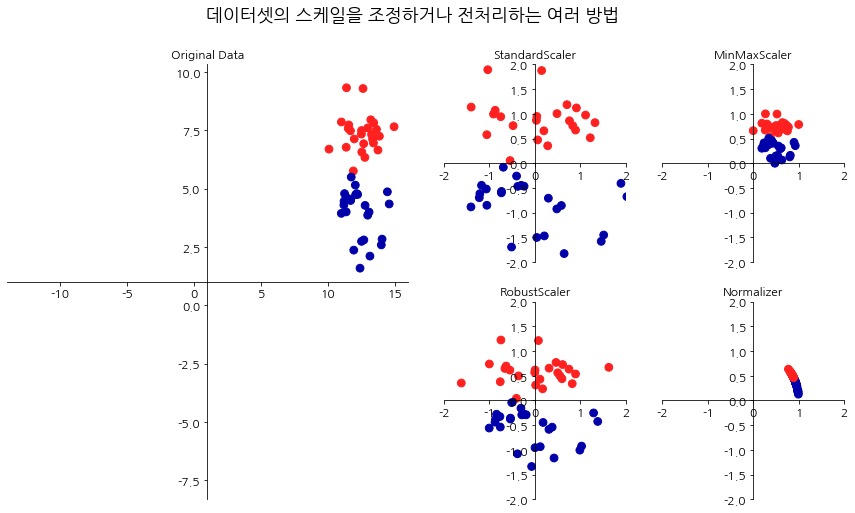

In [12]:
mglearn.plots.plot_scaling()
plt.suptitle("데이터셋의 스케일을 조정하거나 전처리하는 여러 방법", fontsize=18)
plt.show()

* StandardScaler는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 합니다.  
* RobustScaler는 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서 StandardScaler와 비슷하지만 평균과 분산대신 median과 quartile을 사용합니다. 따라서 RobustScaler는 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않습니다.  
* MinMaxScaler는 모든 특성이 0과 1사이에 위치하도록 데이터를 변경합니다.  
* Normalizer는 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정합니다. 즉 지름이 1인 원 혹은 구에 데이터 포인트를 투영합니다.

### 3.1.2 데이터 변환 조정하기

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [14]:
cancer = load_breast_cancer()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)

전처리가 구현된 파이썬 클래스를 임포트하고 객체를 생성합니다.

In [25]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
X_train_scaled = sc.transform(X_train)

# 스케일 조정 후 데이터셋의 속성 출력
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최솟값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


변환된 데이터의 배열 크기는 원래 데이터와 동일합니다. 즉 특성 값이 이동되거나 크기가 조정됩니다. 
테스트데이터에는 어떠한 조작도 있으면 안되기 때문에 훈련데이터에서 사용한 값을 사용합니다.

In [28]:
X_test_scaled = sc.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력
print("스케일 조정 후 특성별 최소값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [29]:
from sklearn.datasets import make_blobs

In [32]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

### 3.1.3 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

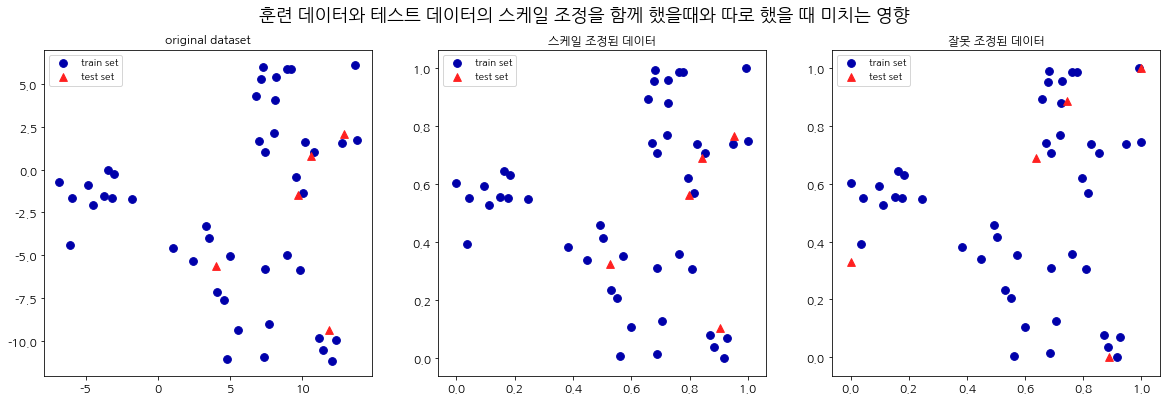

In [70]:
cm1 = np.array(mglearn.cm2(0)).reshape(-1, 4)
cm2 = np.array(mglearn.cm2(1)).reshape(-1, 4)

plt.figure(figsize=(20, 6)).suptitle("훈련 데이터와 테스트 데이터의 스케일 조정을 함께 했을때와 따로 했을 때 미치는 영향", 
                                    fontsize=18)
plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=cm1, label="train set", s=60)
plt.scatter(X_test[:, 0], X_test[:, 1], 
            c=cm2, label="test set", 
            s=60, marker="^")
plt.legend(loc="upper left")
plt.title("original dataset")

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

plt.subplot(132)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
            c=cm1, label="train set", s=60)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], 
            c=cm2, label="test set", 
            s=60, marker="^")
plt.legend(loc="upper left")
plt.title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다.
# 절대로 이런 식의 코딩을 하면 안됩니다.
test_sc = MinMaxScaler()
X_test_scaled_badly = test_sc.fit_transform(X_test)

plt.subplot(133)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
            c=cm1, label="train set", s=60)
plt.scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], 
            c=cm2, label="test set", 
            s=60, marker="^")
plt.legend(loc="upper left")
plt.title("잘못 조정된 데이터")

plt.show()

위 그래프를 보면 첫 번째와 두번째 그래프의 테스트데이터(빨간색)은 같은 비율로 움직였지만 세번째는 테스트 데이터가 다른 비율로 움직였습니다. 이 상태에서 모델을 학습시키 테스트를 하게 되면 우리가 원하는 결과를 얻을 수 있습니다. 

### 3.1.4 지도 학습에서 데이터 전처리 효과

In [71]:
from sklearn.svm import SVC

In [72]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state=0, stratify=cancer.target)

In [73]:
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 정확도: {:.3f}".format(svm.score(X_test, y_test)))

테스트 정확도: 0.629


다음은 MinMaxScaler를 사용해 데이터의 스케일을 조정합니다.

In [74]:
sc = MinMaxScaler()

In [75]:
X_train_scaled = sc.fit(X_train).transform(X_train)
X_test_scaled = sc.transform(X_test)

In [77]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.3f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.944


스케일만 조정하여도 모델의 정확도는 상승했습니다.  
MinMaxScaler()외에 StandardScaler()를 사용해보겠습니다.

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()

In [83]:
X_train_scaled = sc.fit(X_train).transform(X_train)
X_test_scaled = sc.transform(X_test)

In [84]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.3f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.937


MinMaxScaler()보다는 약간 정확도가 떨어졌지만 기존보다는 확실히 상승했습니다.

## 3.2 차원 축소, 특성 추출, 매니폴드 학습

### 3.2.1 주성분 분석  

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술입니다. 회전한 뒤에 데이터를 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됩니다.

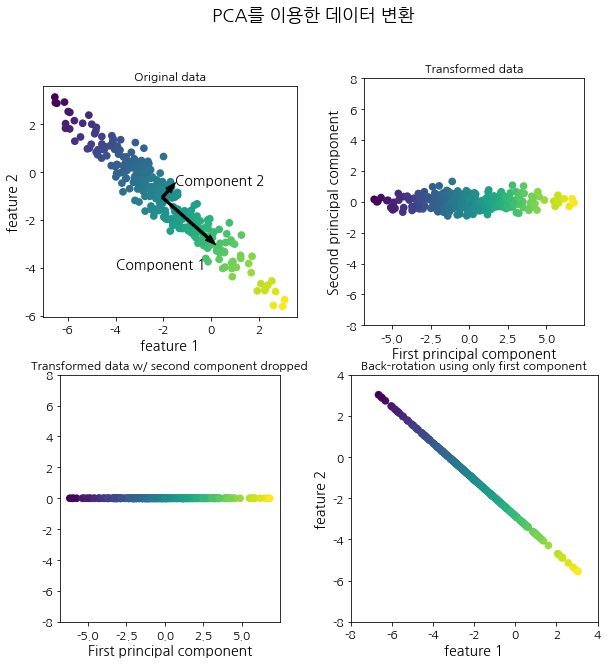

In [89]:
mglearn.plots.plot_pca_illustration()
plt.suptitle("PCA를 이용한 데이터 변환", fontsize=18)
plt.show()

왼쪽 위 그래프는 원본 데이터 포인트를 색으로 구분해 표시한 것입니다. 이 알고리즘은 먼저 "Component 1"이라고 쓰여 있는, 분산이 가장 큰 방향을 찾습니다. 이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향입니다(화살표의 방향은 상관이 없습니다). 즉 특성들의 상관관계가 가장 큰 방향입니다. 그 다음으로 이 알고리즘은 첫 번째 방향과 직각인 방향(이 방향으로 설명할 수 없는) 중에서 가장 많은 정보를 담은 방향을 찾습니다. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 **주성분(principal component)**라고 합니다. 일반적으로 원본 특성 갯수만큼의 주성분이 있습니다.   

오른쪽 위 그래프는 Component 1과 2를 각각 x축과 y축에 나락하도록 회전한 것입니다. 회전하기 전에 에터에서 평균을 빼서 중심을 원점에 맞춥니다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 됩니다(첫번째 방향과 직각이기 때문에).  

PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있습니다. 왼쪽 아래 그래프는 첫번째 주성분만 유지하려고 합니다. 이렇게 하면 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소합니다. 그러나 단순히 원본 특성 중 하나만 남기는 것이 아니라 가장 유용햔 방향을 찾아서 그 방향의 성분, 즉 첫 번째 주성분을 유지하는 것입니다.  

마지막으로 오른쪽 위의 그림에서 평균을 뺏으니 다시 더하고 반대로 회전시킵니다. 이 결과가 오른쪽 아래 그림입니다. 이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있습니다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 종종 사용합니다.

### 3.2.2 PCA를 적용하여 시각화하기

In [91]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [94]:
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

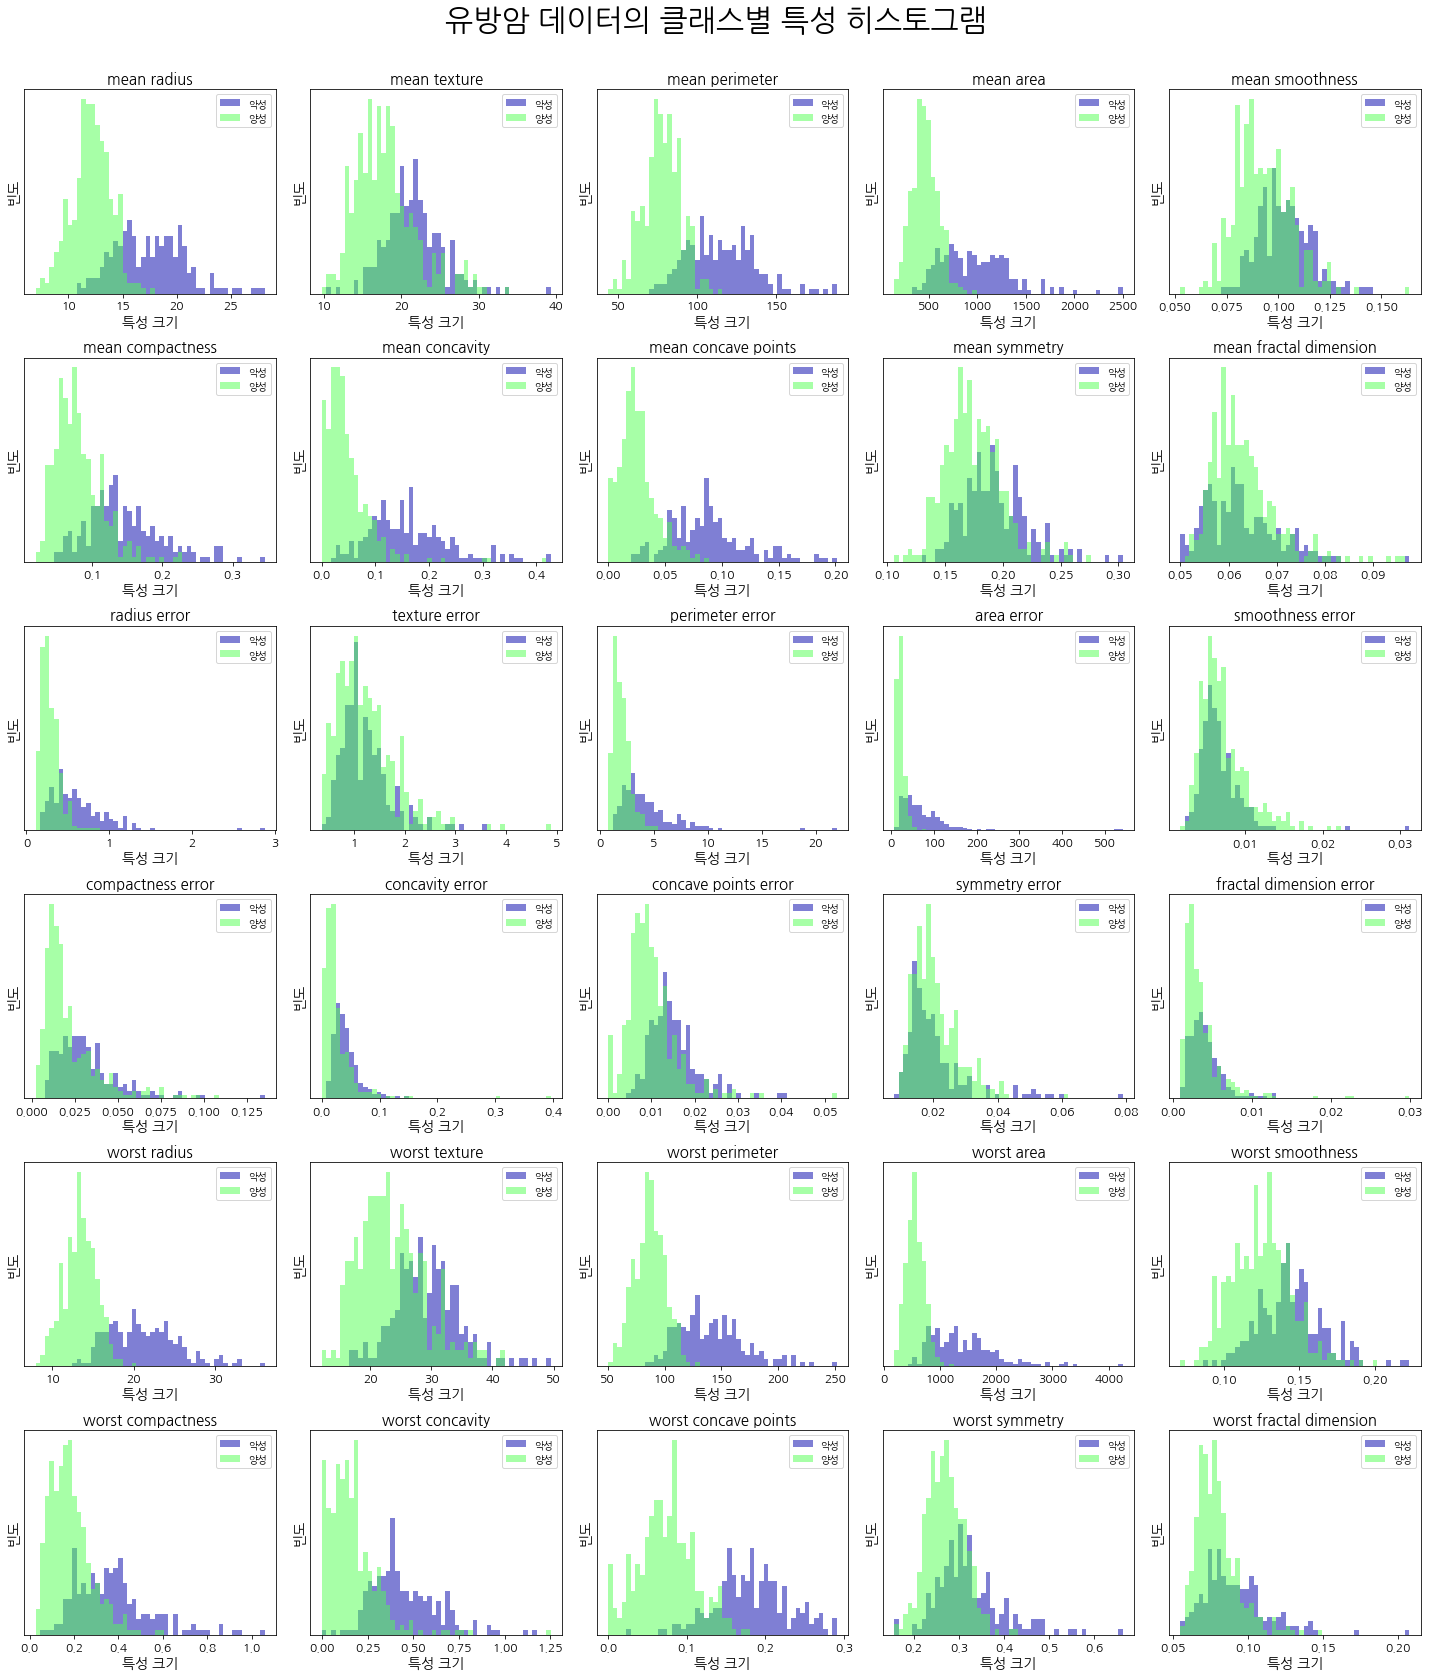

In [129]:
cm0 = np.array(mglearn.cm3(0)).reshape(-1, 4)
cm2 = np.array(mglearn.cm3(2)).reshape(-1, 4)
plt.figure(figsize=(20, 25))
plt.suptitle("유방암 데이터의 클래스별 특성 히스토그램", fontsize=30)
for i in range(len(cancer.feature_names)):
    plt.subplot(6, 5, i+1)
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    plt.hist(malignant[:, i], bins=bins, color=cm0, alpha=.5)
    plt.hist(benign[:, i], bins=bins, color=cm2, alpha=.5)
    plt.title(cancer.feature_names[i], fontsize=15)
    plt.yticks(())
    plt.xlabel("특성 크기")
    plt.ylabel("빈도")
    plt.legend(["악성", "양성"], loc="best")

# 제목을 넣기 위해 공간을 만듬    
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()    

이 그림은 각 특성에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것입니다. 각 그래프는 히스토그램 2개를 겹쳐 놓은 것으로 초록색은 양성 포인트를, 그리고 푸른색은 악성 클래스의 포인트를 나타냅니다. 이 그림은 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고 이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는 지 가늠해 볼 수 있습니다.  

그러나 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못하므로 PCA를 사용하여 상호작용을 고려한 그림을 나타낼 수 있습니다.